# 과제 1

## Matrix 구현 
1. Linear Regression에서 쓰이는 **정규방정식**을 행렬로 구현하고, sklearn 혹은 OLS 패키지를 통해 구한 **실제 값과 비교**해주세요.
2. LSE에서 쓰이는 Loss Function, **MSE**를 행렬로 구현해 출력해주세요.

### Data Load 

In [1]:
import pandas as pd 
data = pd.read_csv("assignment1.csv")

In [2]:
data.head()

,y,x1,x2,x3,x4,x5
0,10,38.9,64.7,4,868,59.7
1,13,41.6,45.3,-4,957,61.4
2,11,39.7,74.1,8,786,61.0
3,7,37.3,48.0,19,984,67.5
4,10,39.5,51.9,6,700,57.2


In [3]:
data.shape     # y:(9,1), X:(9,5)

(9, 6)

In [4]:
X = data.drop(["y"], axis=1)
y = data.y

In [5]:
# Matrix 계산을 위해 X와 y를 numpy 형태로 바꾸어줍니다. 
X = X.to_numpy()
y = y.to_numpy()

In [6]:
X

array([[  38.9,   64.7,    4. ,  868. ,   59.7],
       [  41.6,   45.3,   -4. ,  957. ,   61.4],
       [  39.7,   74.1,    8. ,  786. ,   61. ],
       [  37.3,   48. ,   19. ,  984. ,   67.5],
       [  39.5,   51.9,    6. ,  700. ,   57.2],
       [  37.4,   53.6,   -5. , 1037. ,   58.8],
       [  35.1,   71.4,    3. ,  986. ,   58.6],
       [  38.8,   58.3,    6. ,  819. ,   59.2],
       [  36.6,   52.6,  -19. ,  791. ,   54.4]])

In [7]:
y

array([10, 13, 11,  7, 10,  9,  9,  6,  5], dtype=int64)

### 1. Normal Equation

In [8]:
import numpy as np
from numpy.linalg import inv 

designX
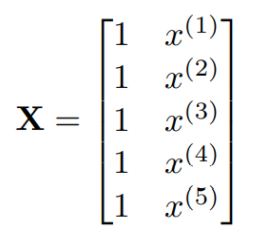

In [9]:
#위의 마크다운처럼 X앞에 각각 1이 추가되도록 함
designX = np.concatenate([np.ones((len(y),1)),X], axis=1)
designX

array([[ 1.000e+00,  3.890e+01,  6.470e+01,  4.000e+00,  8.680e+02,
         5.970e+01],
       [ 1.000e+00,  4.160e+01,  4.530e+01, -4.000e+00,  9.570e+02,
         6.140e+01],
       [ 1.000e+00,  3.970e+01,  7.410e+01,  8.000e+00,  7.860e+02,
         6.100e+01],
       [ 1.000e+00,  3.730e+01,  4.800e+01,  1.900e+01,  9.840e+02,
         6.750e+01],
       [ 1.000e+00,  3.950e+01,  5.190e+01,  6.000e+00,  7.000e+02,
         5.720e+01],
       [ 1.000e+00,  3.740e+01,  5.360e+01, -5.000e+00,  1.037e+03,
         5.880e+01],
       [ 1.000e+00,  3.510e+01,  7.140e+01,  3.000e+00,  9.860e+02,
         5.860e+01],
       [ 1.000e+00,  3.880e+01,  5.830e+01,  6.000e+00,  8.190e+02,
         5.920e+01],
       [ 1.000e+00,  3.660e+01,  5.260e+01, -1.900e+01,  7.910e+02,
         5.440e+01]])

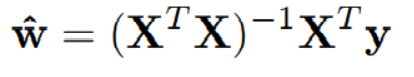

- 본 그림에서의 w는 beta hat과 같은 의미이다

In [10]:
beta_hat = np.dot(np.dot(inv(np.dot(designX.T, designX)), designX.T), y)

In [11]:
def estimate_beta(X, y):
    designX = np.concatenate([np.ones((len(y),1)),X], axis=1)
    
    beta_hat = np.dot(np.dot(inv(np.dot(designX.T, designX)), designX.T), y)
    
    return beta_hat

In [12]:
beta_hat = estimate_beta(X, y)
beta_hat

array([-3.92447368e+01,  1.31232583e+00,  8.53744361e-02,  7.41849897e-02,
        1.50018573e-02, -3.42273652e-01])

In [13]:
beta_hat[0] # intercept

-39.244736781376744

In [14]:
beta_hat[1:6] #추정된 회귀계수

array([ 1.31232583,  0.08537444,  0.07418499,  0.01500186, -0.34227365])

#### 실제 값과 비교

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
model.fit(X, y)

pred = model.predict(X)

In [17]:
print(model.intercept_)   # intercept
print(model.coef_)   # 추정된 회귀계수 (intercept 제외)

-39.24473678135659
[ 1.31232583  0.08537444  0.07418499  0.01500186 -0.34227365]


행렬 계산을 통한 값과 LinearRegression을 통해 얻은 값이 같음을 볼 수 있다.

### 2. MSE

 $SSE = \sum_{}{}(y_i-\hat{y_i})^2$  <br>
 $MSE = \cfrac{SSE}{n-p-1}$ 

In [18]:
#변수 개수 
p = len(X.T)
p

5

In [19]:
def MSE(X, y, beta_hat):
    #위에서와 같은 designX를 사용한다.
    designX = np.concatenate([np.ones((len(y),1)),X], axis=1) 
    # y = X*(beta hat)
    y_pred = np.dot(designX,beta_hat)
    sse = np.sum((y-y_pred)**2)
    mse = sse / (len(y)-p-1)
    
    return mse

In [20]:
MSE(X, y, estimate_beta(X, y))

4.846793168705758